# Part 2 - Translation

You will modify Part 1 to generate the translations of your answers from Part 1 into a particular language (see below) and then back to English.

So, your prompt should look like:

> Your question.  
> Answer in English.  
> Answer in the assigned Language.  
> Answer in English, translated from the above language.

The language you will use for your project is:

Team 1, 4, 7, 10, 13 - Spanish

Team 2,5,8,11 - German

Team 3,6,9,12 - French

Observe the effects of the cyclical translation (e.g., English->French->English) and critique the results in your slides and the report.

Part 2.2 -- use two different HF translation models: use the default translation pipeline, then use other models of choice and discuss the differences in the result.

https://huggingface.co/docs/transformers/main_classes/pipelines

https://huggingface.co/docs/transformers/v4.35.0/en/main_classes/pipelines#transformers.TranslationPipeline


In [6]:
!pip3 install -r ../requirements.txt

%load_ext autoreload
%autoreload 2


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from collections import defaultdict


from src import utils
from src.question_answering import run as qa_run, run_models as qa_run_models

from src.utils import read_context, read_context 
from src.translation import run as tr_run, run_models as tr_run_models


---
---

## Experiments & Results

You will modify Part 1 to generate the translations of your answers from Part 1 into a particular language (see below) and then back to English.

Observe the effects of the cyclical translation (e.g., English->French->English) and critique the results in your slides and the report.


In [5]:
# TODO: Try out a good selection of models and keep some interesting ones
qa_models = [
    # DistilBERT
    # "distilbert-base-cased-distilled-squad",
    "distilbert-base-uncased-distilled-squad",
    # RoBERTa
    # "deepset/roberta-base-squad2",
    # "deepset/roberta-large-squad2",
    # # Deberta
    # "deepset/deberta-v3-base-squad2",
    # "deepset/deberta-v3-large-squad2",
    # # Electra
    # "deepset/electra-base-squad2",
]

In [6]:
# TODO: Try out a good selection of models and keep some interesting ones
tr_models = [
    # "t5-base",
    # "t5-large",
    ("Helsinki-NLP/opus-mt-en-fr", "Helsinki-NLP/opus-mt-fr-en"),
]


Found: ['resolution.0.md', 'resolution.qa.md']
################################################################################
################################################################################
A map is drawn for them by an Englishman named Jonathan Small. You remember that we saw the name upon the chart in Captain Morstan's possession. He had signed it in behalf of himself and his associates,-the sign of the four, as he somewhat dramatically called it. Aided by this chart, the officers-or one of them-gets the treasure and brings it to England, leaving, we will suppose, some condition under which he received it unfulfilled. Now, then, why did not Jonathan Small get the treasure himself? The answer is obvious. The chart is dated at a time when Morstan was brought into close association with convicts. Jonathan Small did not get the treasure because he and his associates were themselves convicts and could not get away." "But that is mere speculation," said I. "It is more th

/Users/tulsitailor/Documents/ChatPI/scratchbooks/src/utils.py:91: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  score = doc1.similarity(doc2)


SIMILARITY: 0.0
----------------------------------------------------------------------------------------------------
model: Helsinki-NLP/opus-mt-en-fr
> Hindoos ou Mohammedans
----------------------------------------------------------------------------------------------------
model: Helsinki-NLP/opus-mt-fr-en
> Hinduos or Mohammedans
SIMILARITY: 0.0
Current Question: What key clues indicate that the perpetrator committed the crime?
Expected Answer: A map is drawn for them by an Englishman named Jonathan Small
--------------------------------------------------------------------------------
model: distilbert-base-uncased-distilled-squad
Q: What key clues indicate that the perpetrator committed the crime?
A: only one white man's name is on the chart (model confidence score: 0.049)
SIMILARITY: 0.3722
----------------------------------------------------------------------------------------------------
model: Helsinki-NLP/opus-mt-en-fr
> Un seul nom d'homme blanc est sur la carte
------------

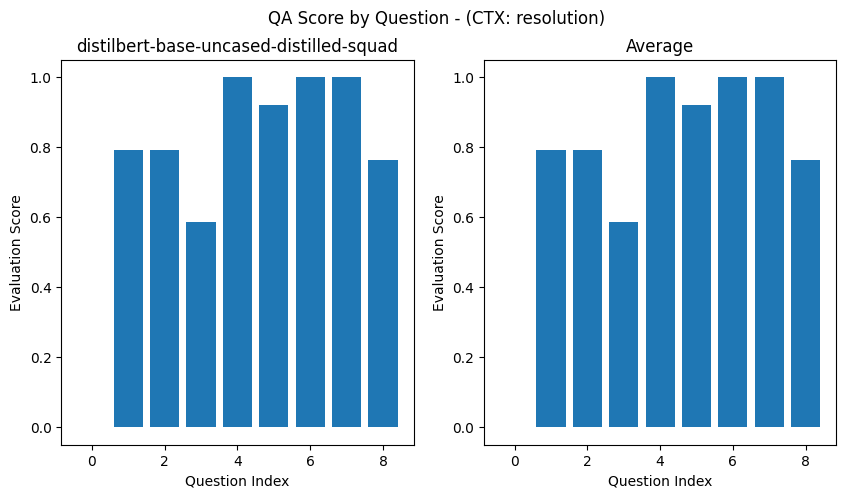

╔═════════╦═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════════════════════════════╦═════════════════════════════════════════════════════════════════════════════════════════════════════════════════╦═══════════════════════════════════════════════════════════════════════════════════════════════════╗
║ Q Idx   ║ Model                                   ║   Score ║ Question                                                                              ║ Answer                                                                                                          ║ Expected Answer                                                                                   ║
╠═════════╬═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════╬═════════════════════════════════════════════════════════════════════════════════════════════════════════════════╬═══

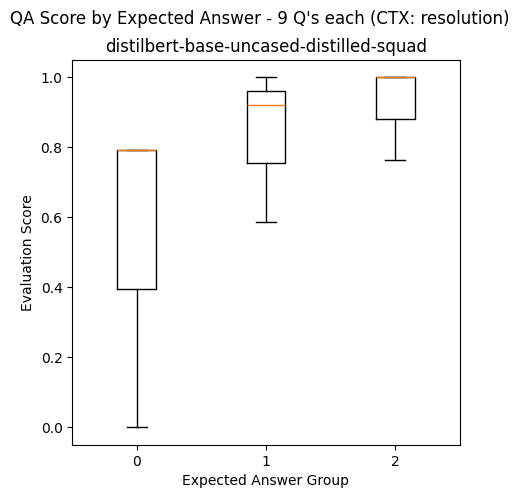

╔═════════════════════════════════════════╦═════════╦═══════════════════════════════════════════════════════════════════════════════════════════════════╦════════╦════════╦════════╗
║ Model                                   ║ A Idx   ║ Expected Answer                                                                                   ║    Min ║   Mean ║    Max ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════════════════╬════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 0       ║ A map is drawn for them by an Englishman named Jonathan Small                                     ║ 0      ║ 0.5281 ║ 0.7921 ║
╠═════════════════════════════════════════╬═════════╬═══════════════════════════════════════════════════════════════════════════════════════════════════╬════════╬════════╬════════╣
║ distilbert-base-uncased-distilled-squad ║ 1       ║ Jonathan Small                           

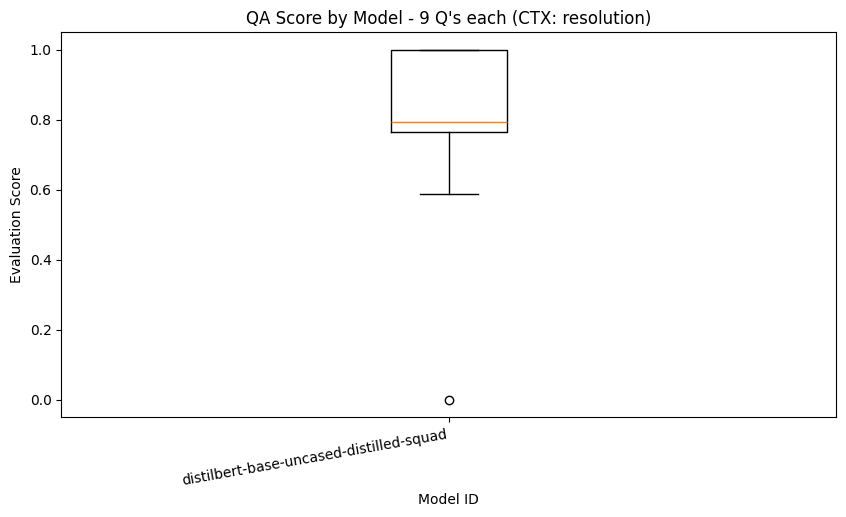

╔═════════════════════════════════════════╦═══════╦════════╦═══════╗
║ Model                                   ║   Min ║   Mean ║   Max ║
╠═════════════════════════════════════════╬═══════╬════════╬═══════╣
║ distilbert-base-uncased-distilled-squad ║     0 ║ 0.7617 ║     1 ║
╠═════════════════════════════════════════╬═══════╬════════╬═══════╣
║ Avg                                     ║     0 ║ 0.7617 ║     1 ║
╚═════════════════════════════════════════╩═══════╩════════╩═══════╝



In [12]:
ctx_name = "resolution"

for i, (fname, ctx) in enumerate(utils.read_context(ctx_name)):
    print("#" * 80)
    print("#" * 80)
    print(ctx)

    # scores_by_question = {m: defaultdict(list) for m in models}
    scores_by_question = defaultdict(list)
    scores_by_answer = {m: defaultdict(list) for m in qa_models}
    scores_by_model = defaultdict(list)

    for j, (question, true_answer) in enumerate(utils.read_qa(ctx_name)):
        print("=" * 80)
        print("=" * 80)
        print(f"Current Question: {question}")
        print(f"Expected Answer: {true_answer}")

        # for k in range(5):
        qa_answers, qa_scores = qa_run_models(
            question,
            ctx,
            qa_models,
            expected_answer=true_answer,
        )

        tr_answers, tr_scores = tr_run_models(qa_answers[0], models=tr_models)

        for k, (m, s) in enumerate(zip(qa_models, tr_scores)):
            scores_by_model[m].append(s)
            scores_by_answer[m][true_answer].append(s)
            scores_by_question[m].append(
                dict(
                    question=question,
                    answer=tr_answers[k],
                    expected_answer=true_answer,
                    score=s,
                )
            )

    utils.create_plots(ctx_name, scores_by_model, scores_by_answer, scores_by_question)

    print()


In [10]:
## TODO: add experiments and results

test_txt = """
Sherlock Holmes took his bottle from the corner of the mantel-piece and
his hypodermic syringe from its neat morocco case. With his long,
white, nervous fingers he adjusted the delicate needle, and rolled back
his left shirt-cuff. For some little time his eyes rested thoughtfully
upon the sinewy forearm and wrist all dotted and scarred with
innumerable puncture-marks. Finally he thrust the sharp point home,
pressed down the tiny piston, and sank back into the velvet-lined
arm-chair with a long sigh of satisfaction.
"""


answers, scores = run_models(test_txt, models=models)


----------------------------------------------------------------------------------------------------
model: Helsinki-NLP/opus-mt-en-fr
> Sherlock Holmes a pris sa bouteille du coin de la cheminée et sa seringue hypodermique de son boîtier morocco soigné. Avec ses doigts longs, blancs et nerveux, il a ajusté l'aiguille délicate, et a roulé sa chemise-cuisse gauche. Pendant un peu de temps, ses yeux reposaient délicatement sur l'avant-bras et le poignet sinueux tous parsemés et marqués d'innombrables marques de ponction. Enfin, il a poussé le point aigu à la maison, a pressé le petit piston, et a coulé dans la chaise de bras doublée de velours avec un long soupir de satisfaction.
----------------------------------------------------------------------------------------------------
model: Helsinki-NLP/opus-mt-fr-en
> Sherlock Holmes took his bottle from the corner of the fireplace and his hypodermic syringe from his neat morocco case. With his long, white and nervous fingers, he adjusted th

In [13]:
print(answers)

print(scores)


[("Sherlock Holmes a pris sa bouteille du coin de la cheminée et sa seringue hypodermique de son boîtier morocco soigné. Avec ses doigts longs, blancs et nerveux, il a ajusté l'aiguille délicate, et a roulé sa chemise-cuisse gauche. Pendant un peu de temps, ses yeux reposaient délicatement sur l'avant-bras et le poignet sinueux tous parsemés et marqués d'innombrables marques de ponction. Enfin, il a poussé le point aigu à la maison, a pressé le petit piston, et a coulé dans la chaise de bras doublée de velours avec un long soupir de satisfaction.", 'Sherlock Holmes took his bottle from the corner of the fireplace and his hypodermic syringe from his neat morocco case. With his long, white and nervous fingers, he adjusted the delicate needle, and rolled his left blouse shirt. For a little while, his eyes were gently resting on the forearm and wrist sinuous all dotted and marked with countless puncture marks. Finally, he pushed the sharp point home, pressed the small plunger, and sank int